In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/clean_risk_data.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

,activeloan_coalt,applicationamount,applicationprice,avgbetweenapplications,avgbetweenapprovedapplications,avgextensions,avgloanterm,countapplicationsafterlastloanclose,countrejectedapplications,countrejectedapplicationsafterlastloanclose,...,housetype_UNKNOWN,identificationtype_IDENTITY_IN_CITY,identificationtype_IDENTITY_IN_HOUSE,identificationtype_IDENTITY_IN_STREET,identificationtype_IDENTITY_IN_UNIVERSE,identificationtype_LASTNAME_IN_HOUSE,identificationtype_NOT_IDENTIFIED,score_partialdecision_GREEN,score_partialdecision_RED,score_partialdecision_YELLOW
0,0,2500,402.11,0.00,0.0,0.0,0.0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,600,0.00,0.00,0.0,0.0,30.0,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,500,0.00,0.00,0.0,0.0,0.0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,500,0.00,0.01,0.0,0.0,0.0,2,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,300,0.00,0.00,0.0,0.0,0.0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# only train the FFN with these meaningful features first
keep_cols = ['applicationamount',
 'applicationprice',
 'averagepaiddebt',
 'averagepaymenttimeindays',
 'correspondence_address_different_pesel_count_p0_360',
 'countrejectedapplications',
 'customerincomecurrent',
 'diff_customerincome',
 'income_charge',
 'masterriskstatus_no_negative_history',
 'paidobligationscount',
 'providerscount',
 'score',
 'sumpaiddebt',
 'swo_ind_loans_amount_p0_210',
 'swo_ind_loans_amount_p0_30',
 'swo_ind_loans_amount_p0_7',
 'swo_ind_loans_amount_p0_90',
 'swo_ind_loans_amount_p0_plus',
 'swo_ind_loans_number_p0_210',
 'swo_ind_loans_number_p0_90',
 'swo_ind_loans_number_p0_plus',
 'swo_ind_same_main_address_different_pesel_count_p0_360',
 'swo_ind_same_pesel_applications_count_p0_210',
 'swo_ind_same_pesel_applications_count_p0_3',
 'swo_ind_same_pesel_applications_count_p0_30',
 'swo_ind_same_pesel_applications_count_p0_360',
 'swo_ind_same_pesel_applications_count_p0_7',
 'swo_ind_same_pesel_applications_count_p0_90',
 'swo_ind_same_pesel_different_lender_count_unique_p0_210',
 'swo_ind_same_pesel_different_lender_count_unique_p0_3',
 'swo_ind_same_pesel_different_lender_count_unique_p0_30',
 'swo_ind_same_pesel_different_lender_count_unique_p0_360',
 'swo_ind_same_pesel_different_lender_count_unique_p0_7',
 'swo_ind_same_pesel_different_lender_count_unique_p0_90',
 'swo_ind_same_pesel_different_main_address_count_p0_30',
 'swo_ind_same_pesel_different_phone_count_unique_p0_210',
 'swo_ind_same_pesel_different_phone_count_unique_p0_30',
 'swo_ind_same_pesel_different_phone_count_unique_p0_7',
 'swo_ind_same_pesel_different_phone_count_unique_p0_90']

In [ ]:
stats_df = df[keep_cols].describe()
stats_df

,applicationamount,applicationprice,averagepaiddebt,averagepaymenttimeindays,correspondence_address_different_pesel_count_p0_360,countrejectedapplications,customerincomecurrent,diff_customerincome,income_charge,masterriskstatus_no_negative_history,...,swo_ind_same_pesel_different_lender_count_unique_p0_3,swo_ind_same_pesel_different_lender_count_unique_p0_30,swo_ind_same_pesel_different_lender_count_unique_p0_360,swo_ind_same_pesel_different_lender_count_unique_p0_7,swo_ind_same_pesel_different_lender_count_unique_p0_90,swo_ind_same_pesel_different_main_address_count_p0_30,swo_ind_same_pesel_different_phone_count_unique_p0_210,swo_ind_same_pesel_different_phone_count_unique_p0_30,swo_ind_same_pesel_different_phone_count_unique_p0_7,swo_ind_same_pesel_different_phone_count_unique_p0_90
count,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9.925000e+03,9.925000e+03,9925.000000,9925.000000,...,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000
mean,1123.183879,108.332946,1329.311731,1.303375,4.832040,1.554861,2.206472e+05,-2.201991e+05,0.059032,0.792343,...,1.018237,3.802418,11.687960,1.640101,6.905088,1.272645,0.377128,0.153552,0.077985,0.263980
std,880.095596,162.316948,1243.798155,3.565073,10.603965,2.958830,2.155578e+07,2.155579e+07,1.406207,0.405651,...,1.698972,4.307314,10.095207,2.345346,6.903161,3.512634,1.024361,0.548163,0.343600,0.789924
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.147484e+09,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,0.000000,488.250000,0.000000,0.000000,0.000000,2.500000e+03,-4.000000e+03,0.000000,1.000000,...,0.000000,1.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,800.000000,0.000000,1022.350000,0.000000,0.000000,1.000000,3.077000e+03,-3.000000e+03,0.000000,1.000000,...,0.000000,2.000000,9.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1300.000000,160.850000,1961.790000,1.000000,5.000000,2.000000,4.200000e+03,-2.200000e+03,0.050000,1.000000,...,1.000000,5.000000,17.000000,2.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3000.000000,482.540000,13741.520000,50.000000,100.000000,53.000000,2.147484e+09,7.137610e+05,80.430000,1.000000,...,15.000000,30.000000,58.000000,19.000000,44.000000,62.000000,12.000000,7.000000,5.000000,10.000000


In [ ]:
# only train with non-binary columns
nonzero_cols = stats_df.columns[stats_df.apply(lambda x: x['50%'] > 0.0, axis=0).values]
nonzero_cols

Index(['applicationamount', 'averagepaiddebt', 'countrejectedapplications',
       'customerincomecurrent', 'masterriskstatus_no_negative_history',
       'paidobligationscount', 'providerscount', 'score', 'sumpaiddebt',
       'swo_ind_loans_amount_p0_210', 'swo_ind_loans_amount_p0_30',
       'swo_ind_loans_amount_p0_90', 'swo_ind_loans_amount_p0_plus',
       'swo_ind_loans_number_p0_210', 'swo_ind_loans_number_p0_90',
       'swo_ind_loans_number_p0_plus',
       'swo_ind_same_main_address_different_pesel_count_p0_360',
       'swo_ind_same_pesel_applications_count_p0_210',
       'swo_ind_same_pesel_applications_count_p0_3',
       'swo_ind_same_pesel_applications_count_p0_30',
       'swo_ind_same_pesel_applications_count_p0_360',
       'swo_ind_same_pesel_applications_count_p0_7',
       'swo_ind_same_pesel_applications_count_p0_90',
       'swo_ind_same_pesel_different_lender_count_unique_p0_210',
       'swo_ind_same_pesel_different_lender_count_unique_p0_30',
       'swo_ind

In [ ]:
from sklearn.model_selection import train_test_split

X,y = df.drop('TARGET',axis=1), df['TARGET']
X_train_arr, X_test_arr, y_train_arr, y_test_arr = train_test_split(X[nonzero_cols], y, test_size=0.3, random_state=2111, stratify=y)

In [ ]:
X_train_arr.describe()

,applicationamount,averagepaiddebt,countrejectedapplications,customerincomecurrent,masterriskstatus_no_negative_history,paidobligationscount,providerscount,score,sumpaiddebt,swo_ind_loans_amount_p0_210,...,swo_ind_same_pesel_applications_count_p0_3,swo_ind_same_pesel_applications_count_p0_30,swo_ind_same_pesel_applications_count_p0_360,swo_ind_same_pesel_applications_count_p0_7,swo_ind_same_pesel_applications_count_p0_90,swo_ind_same_pesel_different_lender_count_unique_p0_210,swo_ind_same_pesel_different_lender_count_unique_p0_30,swo_ind_same_pesel_different_lender_count_unique_p0_360,swo_ind_same_pesel_different_lender_count_unique_p0_7,swo_ind_same_pesel_different_lender_count_unique_p0_90
count,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,...,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000,6947.000000
mean,1119.418454,1312.701887,1.539801,4157.482223,0.794588,6.474305,1.212754,479.197207,12556.870528,13886.901539,...,1.357564,5.518353,20.139341,2.151576,11.039873,9.451850,3.759752,11.588887,1.647762,6.804952
std,879.116777,1218.852494,2.948149,10759.623427,0.404032,10.428387,0.819917,30.845009,27769.309953,19877.861600,...,2.274554,7.837175,23.930179,3.208903,14.306031,8.579305,4.266160,10.037447,2.352137,6.799975
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,327.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,499.515000,0.000000,2500.000000,1.000000,1.000000,1.000000,459.000000,600.000000,1600.000000,...,0.000000,1.000000,5.000000,0.000000,2.000000,3.000000,1.000000,4.000000,0.000000,2.000000
50%,800.000000,1015.790000,1.000000,3000.000000,1.000000,3.000000,1.000000,479.000000,3306.410000,6160.900000,...,1.000000,3.000000,12.000000,1.000000,6.000000,7.000000,2.000000,9.000000,1.000000,5.000000
75%,1300.000000,1922.945000,2.000000,4200.000000,1.000000,8.000000,2.000000,500.000000,12181.845000,17731.365000,...,2.000000,7.000000,26.000000,3.000000,14.000000,14.000000,5.000000,17.000000,2.000000,10.000000
max,3000.000000,13741.520000,53.000000,400040.000000,1.000000,156.000000,5.000000,583.000000,617303.310000,215437.040000,...,22.000000,100.000000,265.000000,34.000000,199.000000,46.000000,28.000000,58.000000,19.000000,44.000000


In [ ]:
# standardized
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train_arr)
X_test_scaled = scl.transform(X_test_arr)

In [ ]:
# better but still too high => might try logit clipping
def logit_clip(logit):
  return torch.clamp(logit, min=-15, max=15)

In [ ]:
import torch
from torch.utils.data import DataLoader

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

In [ ]:
import random
import os

SEED = 2111

def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = True

seed_everything(SEED)

In [ ]:
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train_arr.values, dtype=torch.float32)
y_test = torch.tensor(y_test_arr.values, dtype=torch.float32)

In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self,index):
    if self.y != None:
      return self.x[index].to(DEVICE), self.y[index].to(DEVICE)
    else:
      return self.x[index].to(DEVICE)

In [ ]:
train_loader_params = {'batch_size': 32,
                       'shuffle': True,
                       'num_workers': 0}
test_loader_params = {'batch_size': 32,
                       'num_workers': 0}
train_set = Dataset(X_train, y_train)
test_set = Dataset(X_test, y_test)
train_loader = DataLoader(train_set,**train_loader_params)
test_loader = DataLoader(test_set, **test_loader_params)

In [ ]:
# baseline FFN
class LoanDefaultMLP(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super().__init__()
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(hidden_size,1)

  def forward(self, x):
    hidden = self.fc1(x)
    hidden = self.relu(hidden)
    output = self.fc2(hidden)
    return output

In [ ]:
model = LoanDefaultMLP(X_train.shape[1], 1000).to(DEVICE)
loss = torch.nn.BCEWithLogitsLoss(reduction="mean").to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.07)

In [ ]:
def eval_model(model, generator, loss):
  model.eval()
  with torch.no_grad():
    batch_losses = []
    for x_batch, y_batch in generator: # each batch has 64 obs
      logit = model(x_batch)
      cost = loss(logit.squeeze(), y_batch)
      batch_losses.append(cost.item())
    return np.mean(batch_losses)

eval_model(model, test_loader, loss)

77.41317278273563

In [ ]:
# debugging
x_ex, y_ex = train_set[:32]
def sigmoid(x):
      return 1 / (1 + np.exp(-x))
def log_loss(x, y):
    y_pred = sigmoid(x)
    loss = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

log_loss(-10,0)

4.539889921682063e-05

In [ ]:
# debugging: try to overfit 1 batch => successful
import time

n_epochs = 10

start_time = time.time()
train_losses, test_losses = [], []
for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  logits = model(x_ex)
  cost = loss(logits.squeeze(), y_ex)
  print(cost.item())
  cost.backward()
  optimizer.step()
  train_losses.append(cost.item())

training_time = time.time() - start_time

4.21170043409802e-05
2.796511398628354e-05
4.57450732938014e-05
0.0005360158975236118
0.002507711760699749
0.0001331126841250807
1.0322251910110936e-05
4.420041477715131e-06
3.4414899801049614e-06
2.9886937227274757e-06


In [ ]:
model = LoanDefaultMLP(X_train.shape[1], 1000).to(DEVICE)
loss = torch.nn.BCEWithLogitsLoss(reduction="mean").to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.07)

In [ ]:
# train with the entire train_set, limited feature set
n_epochs = 10

start_time = time.time()
train_losses, test_losses = [], []
for epoch in range(n_epochs):
  model.train()
  train_loss = []
  for i, (x_batch,y_batch) in enumerate(train_loader):
    optimizer.zero_grad()
    logits = model(x_batch)
    cost = loss(logits.squeeze(), y_batch)
    cost.backward()
    optimizer.step()
    train_loss.append(cost.item())
  train_losses.append(np.mean(train_loss))
  print(f'Epoch {epoch}: train loss: {np.mean(train_loss)}')

  # eval
  model.eval()
  val_loss = eval_model(model,test_loader, loss)
  test_losses.append(val_loss)


  print(f'Test loss: {val_loss}')

training_time = time.time() - start_time
print(f'Training time: {training_time}')

Epoch 0: train loss: 0.5342281368484191
Test loss: 0.5608446664632635
Epoch 1: train loss: 0.5196011941367333
Test loss: 200.50838573926941
Epoch 2: train loss: 0.5795439863150272
Test loss: 0.5400636456114181
Epoch 3: train loss: 0.523636834337077
Test loss: 147.2700492757115
Epoch 4: train loss: 0.5713240102343603
Test loss: 0.5283852089592751
Epoch 5: train loss: 0.5540705547420257
Test loss: 0.6731808659561137
Epoch 6: train loss: 1.2411816365538386
Test loss: 1.4876576769859233
Epoch 7: train loss: 1.0748294482024712
Test loss: 1.315233754033738
Epoch 8: train loss: 0.82995960753787
Test loss: 2772.0937679484487
Epoch 9: train loss: 1.004819166838029
Test loss: 0.6098669352049523
Training time: 147.74474358558655


In [ ]:
# compute average precision
y_preds = model(X_test).detach().cpu().numpy()
y_true = y_test.detach().cpu().numpy()

In [ ]:
# distribution of predicted probs
pd.Series(sigmoid(y_preds).ravel()).describe()

,0
count,2978.000000
mean,0.265045
std,0.179611
min,0.000000
25%,0.129941
50%,0.295123
75%,0.295123
max,1.000000


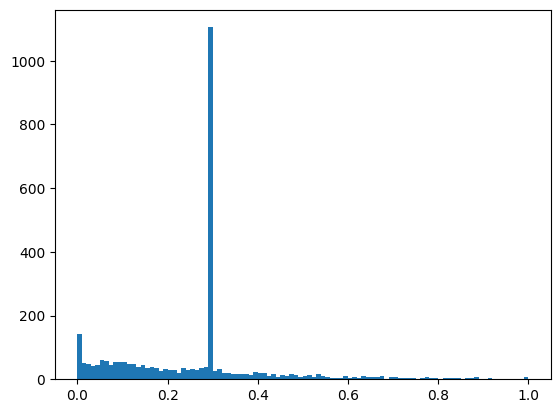

In [ ]:
plt.hist(sigmoid(y_preds),bins=100);

In [ ]:
from sklearn.metrics import average_precision_score, roc_auc_score
print(f"AP: {average_precision_score(y_true, sigmoid(y_preds))}")
print(f"AUC: {roc_auc_score(y_true, sigmoid(y_preds))}")

AP: 0.2650133256825874
AUC: 0.5857197536224892


In [ ]:
# train again using all features
# check stats to see what columns to standardize: about 30 binary cols
df.columns[(df.describe().apply(lambda x: x['max'],axis=0) <= 1).values].shape

(30,)

In [ ]:
# 81 cols have max values from 1 to 15: might not standardize these
df.columns[(df.describe().apply(lambda x: x['max'],axis=0).apply(lambda x: 1 < x <= 15)).values].shape

(81,)

In [ ]:
# standardize all remaning cols
df.columns.shape[0] - 30 - 81

104

In [ ]:
# standardize all these cols but remove datetime like year
# can learn datetime representation later with encoder-based transformer
full_cols = df.columns[(df.describe().apply(lambda x: x['max'],axis=0) > 15).values]
full_cols

Index(['applicationamount', 'applicationprice', 'avgbetweenapplications',
       'avgbetweenapprovedapplications', 'avgloanterm',
       'countrejectedapplications',
       'countrejectedapplicationsafterlastloanclose', 'customerincomecurrent',
       'customerincomeprevious', 'income_charge',
       ...
       'swo_ind_same_phone_different_pesel_count_p0_360', 'score',
       'oinformationcount', 'informationcount', 'amount',
       'paidobligationscount', 'averagepaiddebt', 'averagepaymenttimeindays',
       'sumpaiddebt', 'year'],
      dtype='object', length=104)

In [ ]:
# don't keep all binary cols, just those in the meaningful feature set
# same as before, better to learn the embeddings of binary categorical variables
binary_cols = [feature for feature in
 df.columns[(df.describe().apply(lambda x: x['max'],axis=0).apply(lambda x: 1 < x <= 15)).values]
 if feature in keep_cols]
binary_cols

['swo_ind_same_pesel_different_lender_count_unique_p0_3',
 'swo_ind_same_pesel_different_phone_count_unique_p0_7',
 'swo_ind_same_pesel_different_phone_count_unique_p0_30',
 'swo_ind_same_pesel_different_phone_count_unique_p0_90',
 'swo_ind_same_pesel_different_phone_count_unique_p0_210',
 'providerscount']

In [ ]:
# doublecheck types of these cols: all numeric
df[full_cols.values].dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
# split data again using the same seed
X_train_arr, X_test_arr, y_train_arr, y_test_arr = train_test_split(X, y, test_size=0.3, random_state=2111, stratify=y)

In [ ]:
full_scl = StandardScaler()
fullX_train = full_scl.fit_transform(X_train_arr[full_cols.values].drop('year',axis=1))
fullX_test = full_scl.transform(X_test_arr[full_cols.values].drop('year',axis=1))

In [ ]:
scaled_X_train = pd.concat([X_train_arr[binary_cols].reset_index(),
           pd.DataFrame(fullX_train,columns=full_scl.get_feature_names_out()).reset_index()],axis=1).drop('index',axis=1)
scaled_X_test = pd.concat([X_test_arr[binary_cols].reset_index(),
           pd.DataFrame(fullX_test,columns=full_scl.get_feature_names_out()).reset_index()],axis=1).drop('index',axis=1)

In [ ]:
scaled_X_train = torch.tensor(scaled_X_train.values, dtype=torch.float32)
scaled_X_test = torch.tensor(scaled_X_test.values, dtype=torch.float32)

In [ ]:
scaled_train_set = Dataset(scaled_X_train, y_train)
scaled_test_set = Dataset(scaled_X_test, y_test)
scaled_train_loader = DataLoader(scaled_train_set,**train_loader_params)
scaled_test_loader = DataLoader(scaled_test_set, **test_loader_params)

In [ ]:
# final model
model = LoanDefaultMLP(scaled_X_train.shape[1], 1000).to(DEVICE)
loss = torch.nn.BCEWithLogitsLoss(reduction="mean").to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.07)

In [ ]:
# train with the entire train_set, full feature set
n_epochs = 5

start_time = time.time()
train_losses, test_losses = [], []
for epoch in range(n_epochs):
  model.train()
  train_loss = []
  for i, (x_batch,y_batch) in enumerate(scaled_train_loader):
    optimizer.zero_grad()
    logits = model(x_batch)
    cost = loss(logits.squeeze(), y_batch)
    cost.backward()
    optimizer.step()
    train_loss.append(cost.item())
  train_losses.append(np.mean(train_loss))
  print(f'Epoch {epoch}: train loss: {np.mean(train_loss)}')

  # eval
  model.eval()
  val_loss = eval_model(model,scaled_test_loader, loss)
  test_losses.append(val_loss)
  print(f'Test loss: {val_loss}')

training_time = time.time() - start_time
print()
print(f'Training time: {training_time}')

Epoch 0: train loss: 8.594749022924573
Test loss: 7.479505070980559
Epoch 1: train loss: 12.632375276416813
Test loss: 7.422851917274455
Epoch 2: train loss: 7.175558290794628
Test loss: 4.422669772772079
Epoch 3: train loss: 7.066624272853956
Test loss: 5.451221020931893
Epoch 4: train loss: 4.294966334049855
Test loss: 9012.917465543811

Training time: 69.2742006778717


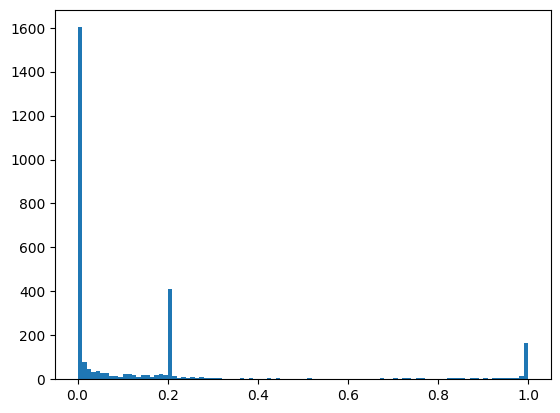

In [ ]:
# sigmoid the logits
final_preds = sigmoid(model(scaled_X_test).detach().cpu().numpy())
plt.hist(final_preds,bins=100);

In [ ]:
# predicted probs distribution
pd.Series(final_preds.ravel()).describe()

,0
count,2.978000e+03
mean,1.572541e-01
std,2.834148e-01
min,0.000000e+00
25%,6.103509e-10
50%,2.804043e-03
75%,2.054080e-01
max,1.000000e+00


In [ ]:
print(f"AP: {average_precision_score(y_true, final_preds)}")
print(f"AUC: {roc_auc_score(y_true, final_preds)}")

AP: 0.32199693936931084
AUC: 0.6171554011675592


In [ ]:
(y_test == y_true).all()

tensor(True)

In [ ]:
# compare the 2 FFNs: limited vs fuller (datetime excluded) feature sets
from sklearn.metrics import roc_curve, precision_recall_curve
# plot the results

def plot_performance(y_test, y_probs, names = ['limited', 'fuller']):
  aucs, aps = [], []
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  for i, model in enumerate(names):
    name = names[i]
    y_preds = y_probs[i]

    # AUC metric
    auc = roc_auc_score(y_test, y_preds)
    aucs.append(auc)

    # AP metric
    ap = average_precision_score(y_test, y_preds)
    aps.append(ap)

    # ROC and PR plots
    fpr, tpr, _ = roc_curve(y_test, y_preds)
    ax[0].plot(fpr, tpr, label=f"{name}: AUC={auc:.2f}")
    prec, rec, _ = precision_recall_curve(y_test, y_preds)
    ax[1].plot(rec, prec, label=f"{name}: AP={ap:.2f}")

  ax[0].legend()
  ax[1].legend()
  ax[0].plot([0,1],linestyle='--',color='gray')
  ax[0].set_title('ROC curves')
  ax[1].set_title('Precision-Recall curves')

  plt.tight_layout();
  return aucs, aps


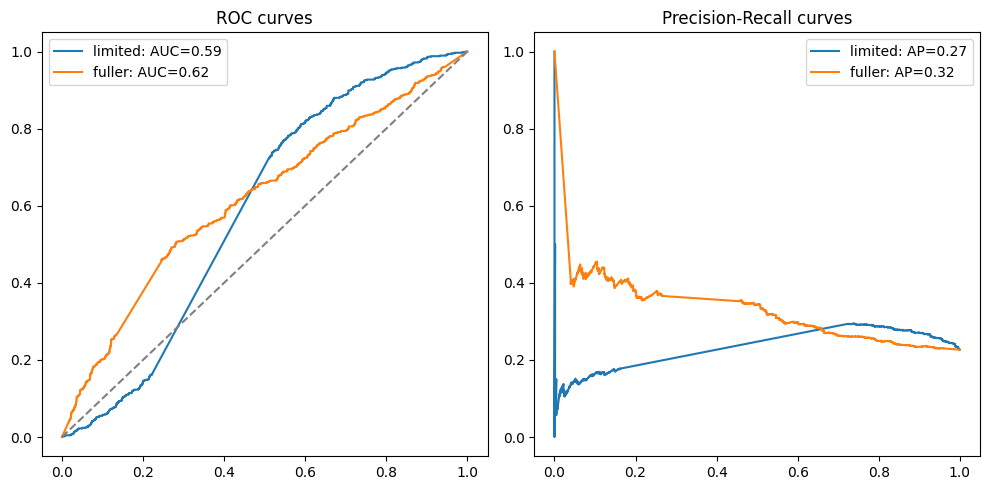

In [ ]:
aucs, aps = plot_performance(y_true, [y_preds, final_preds]);

In [ ]:
pd.DataFrame({'model':['limited','fuller'],'AUC':aucs,'AP':aps})

,model,AUC,AP
0,limited,0.585720,0.265013
1,fuller,0.617155,0.321997


In [ ]:
# theoretical min threshold for AP?
np.bincount(y_test)

array([2303,  675])

In [ ]:
# ToDos: implement regularization - dropout, early stopping
# any other categorical variable worth learning?